## Task 1


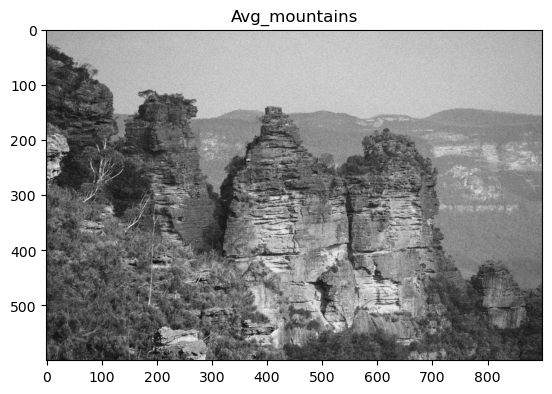

In [88]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

imgs = [cv2.imread(f'Mountains{i:02d}.jpg') for i in range(1, 11)]
avg_img = np.mean(imgs, axis=0).astype(np.uint8)
cv2.imwrite('avg_mountains.jpg', avg_img)
img = cv2.imread('avg_mountains.jpg')
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.title('Avg_mountains')
plt.show()

##  part2 :Noise Reduction

In [89]:
N=len(imgs)
theorical_factor=np.sqrt(N)
print(" Theorical factor: ", theorical_factor)

 Theorical factor:  3.1622776601683795


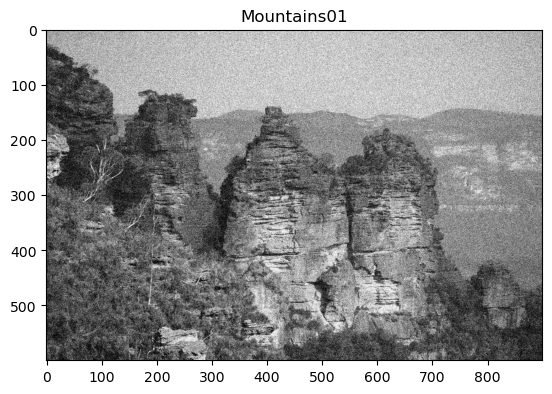

size of image 900 600


In [90]:

img = cv2.imread('Mountains01.jpg')
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.title('Mountains01')
plt.show()

height, width = img.shape[:2]
print("size of image", width, height)


## part3: Actual factor

In [91]:
x1, y1, x2, y2 = 0, 0, 900, 120 

sky_std_single = np.std(imgs[0][y1:y2, x1:x2, :])
sky_std_avg = np.std(avg_img[y1:y2, x1:x2, :])
actual_ratio = sky_std_single / sky_std_avg

print("single noise images:", sky_std_single)
print("avg noise imges:", sky_std_avg)
print("the ratio:", actual_ratio)


single noise images: 40.46666065269746
avg noise imges: 33.19347461526061
the ratio: 1.2191149351412889


## Task 2

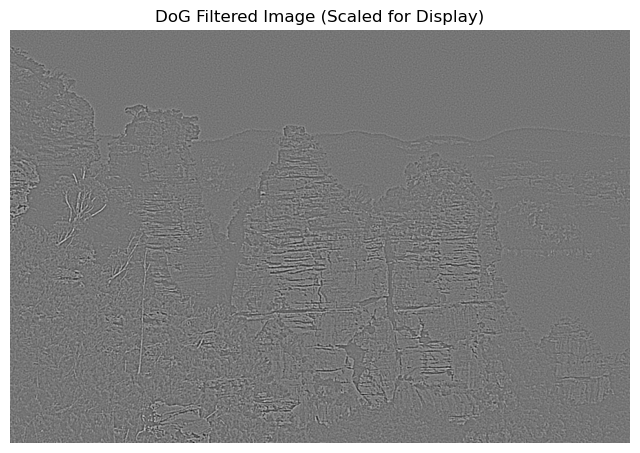

In [92]:
# h1 
h1 = np.array([
    [0,0,0,0,0],
    [0,1,2,1,0],
    [0,2,4,2,0],
    [0,1,2,1,0],
    [0,0,0,0,0]
], dtype=np.float32)
h1 /= 16 

# h2 
h2 = np.array([
    [1,4,6,4,1],
    [4,16,24,16,4],
    [6,24,36,24,6],
    [4,16,24,16,4],
    [1,4,6,4,1]
], dtype=np.float32)
h2 /= 256  



# Method 1: DoG filter directly on the averaged image
avg_img_float=avg_img.astype(np.float32)

DOG=h1 - h2
dog_img1=cv2.filter2D(avg_img_float, -1, DOG)

# normalize for display
dog_img1_disp = dog_img1 - dog_img1.min()   
dog_img1_disp = 255 * dog_img1_disp / dog_img1_disp.max()  
plt.figure(figsize=(8,6))
plt.imshow(dog_img1_disp.astype(np.uint8))
plt.axis('off')
plt.title("DoG Filtered Image (Scaled for Display)")
plt.show()


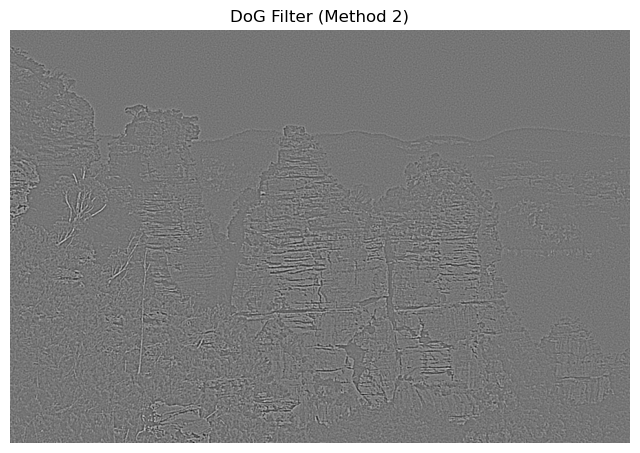

In [93]:
# Method 2: Convolve with h1 and h2 separately, then subtract
conv_h1 = cv2.filter2D(avg_img_float, -1, h1)
conv_h2 = cv2.filter2D(avg_img_float, -1, h2)


dog_img2 = conv_h1 - conv_h2
dog_img2_disp = dog_img2 - dog_img2.min()   
dog_img2_disp = 255 * dog_img2_disp / dog_img2_disp.max()  

plt.figure(figsize=(8,6))
plt.imshow(dog_img2_disp.astype(np.uint8))
plt.axis('off')
plt.title("DoG Filter (Method 2)")
plt.show()

In [94]:
# accmulate the difference
diff_float = dog_img1 - dog_img2
print("biggest difference (float32):", np.max(np.abs(diff_float)))  # should be very small


biggest difference (float32): 0.0


## Task 3


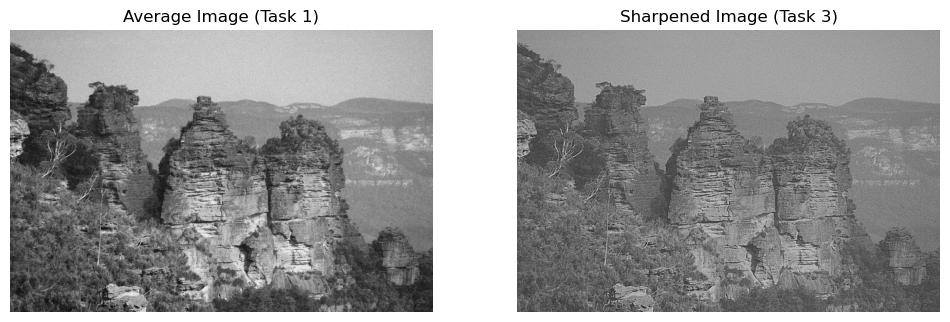

In [95]:
factor = 5
dog_sharp = dog_img1 * factor

# add back to original
sharpened_img = avg_img.astype(np.float32) + dog_sharp

# normalize for display
sharpened_disp = sharpened_img - sharpened_img.min()
sharpened_disp = 255 * sharpened_disp / sharpened_disp.max()
sharpened_disp = sharpened_disp.astype(np.uint8)

# show the difference between original and sharpened
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.imshow(avg_img.astype(np.uint8))
plt.axis('off')
plt.title("Average Image (Task 1)")

plt.subplot(1,2,2)
plt.imshow(sharpened_disp)
plt.axis('off')
plt.title("Sharpened Image (Task 3)")

plt.show()